# Introduction

> This study aims to evaluate whether the average ACT score can be predicted by socioeconomic factors. The data were obtained from EdGap.org and NCES, including variables such as unemployment rate, median family income, educational attainment, percentage of students receiving free or reduced-price lunch, and charter school status. In addition, the analysis incorporates the poverty rate in neighborhoods surrounding schools to examine how local economic conditions influence academic performance. This additional variable provides more diversity in the analysis but may also introduce overlap, as it shares context with median income; therefore, both variables will be carefully examined when used together. The applied methodology includes data cleaning, analysis, and modeling to determine which socioeconomic factors most strongly affect the average ACT score. Besides that, the known limitation that the sample covers only about 20 states.

# Load Libraries
We start by importing the core libraries for data analysis and visualization. Pandas will be used for handling data, Numpy will be used for calculation methods, and Matplotlib/Seaborn will support charting.

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.anova as sms
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Load and inspect data

Load the EdGap data set

In [367]:
edgap = pd.read_excel(
  '../data/EdGap_data.xlsx', 
  dtype={'NCESSCH School ID': object})

/Users/congho/SU_Homework/data-5100-foundations-of-data-science/education/venv/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [368]:
school_information = pd.read_csv(
  '../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape'
)

/var/folders/hm/_316rgmd4v763bh_ttk3pzkr0000gn/T/ipykernel_11764/3687044859.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv(


## Explore the contents of the data sets

### Start by looking at the head of each data frame

This will let us see the names of the columns and a few example values for each column. We can also check whether the data is in tidy format.

In [369]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [370]:
pd.set_option('display.max_columns', None)
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


Use the info method to check the data types, size of the data frame, and numbers of missing values

In [371]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [372]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

Based on the information of these dataset, we have some overall information that:
1. The school information data set is much larger then the EdGap data set. Clearly the EdGap data set does not include all schools.
2. There are missing value in EdGap data set.
3. Each data set is in a tidy, or long format.
4. The data types for the variables of interest look correct, but the school information identifier is an `object` in the EdGap data set and a `float64` in the school information data set.

Next we want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

Make a pair plot to explore relationships between the variables and regression lines and format the pair plot

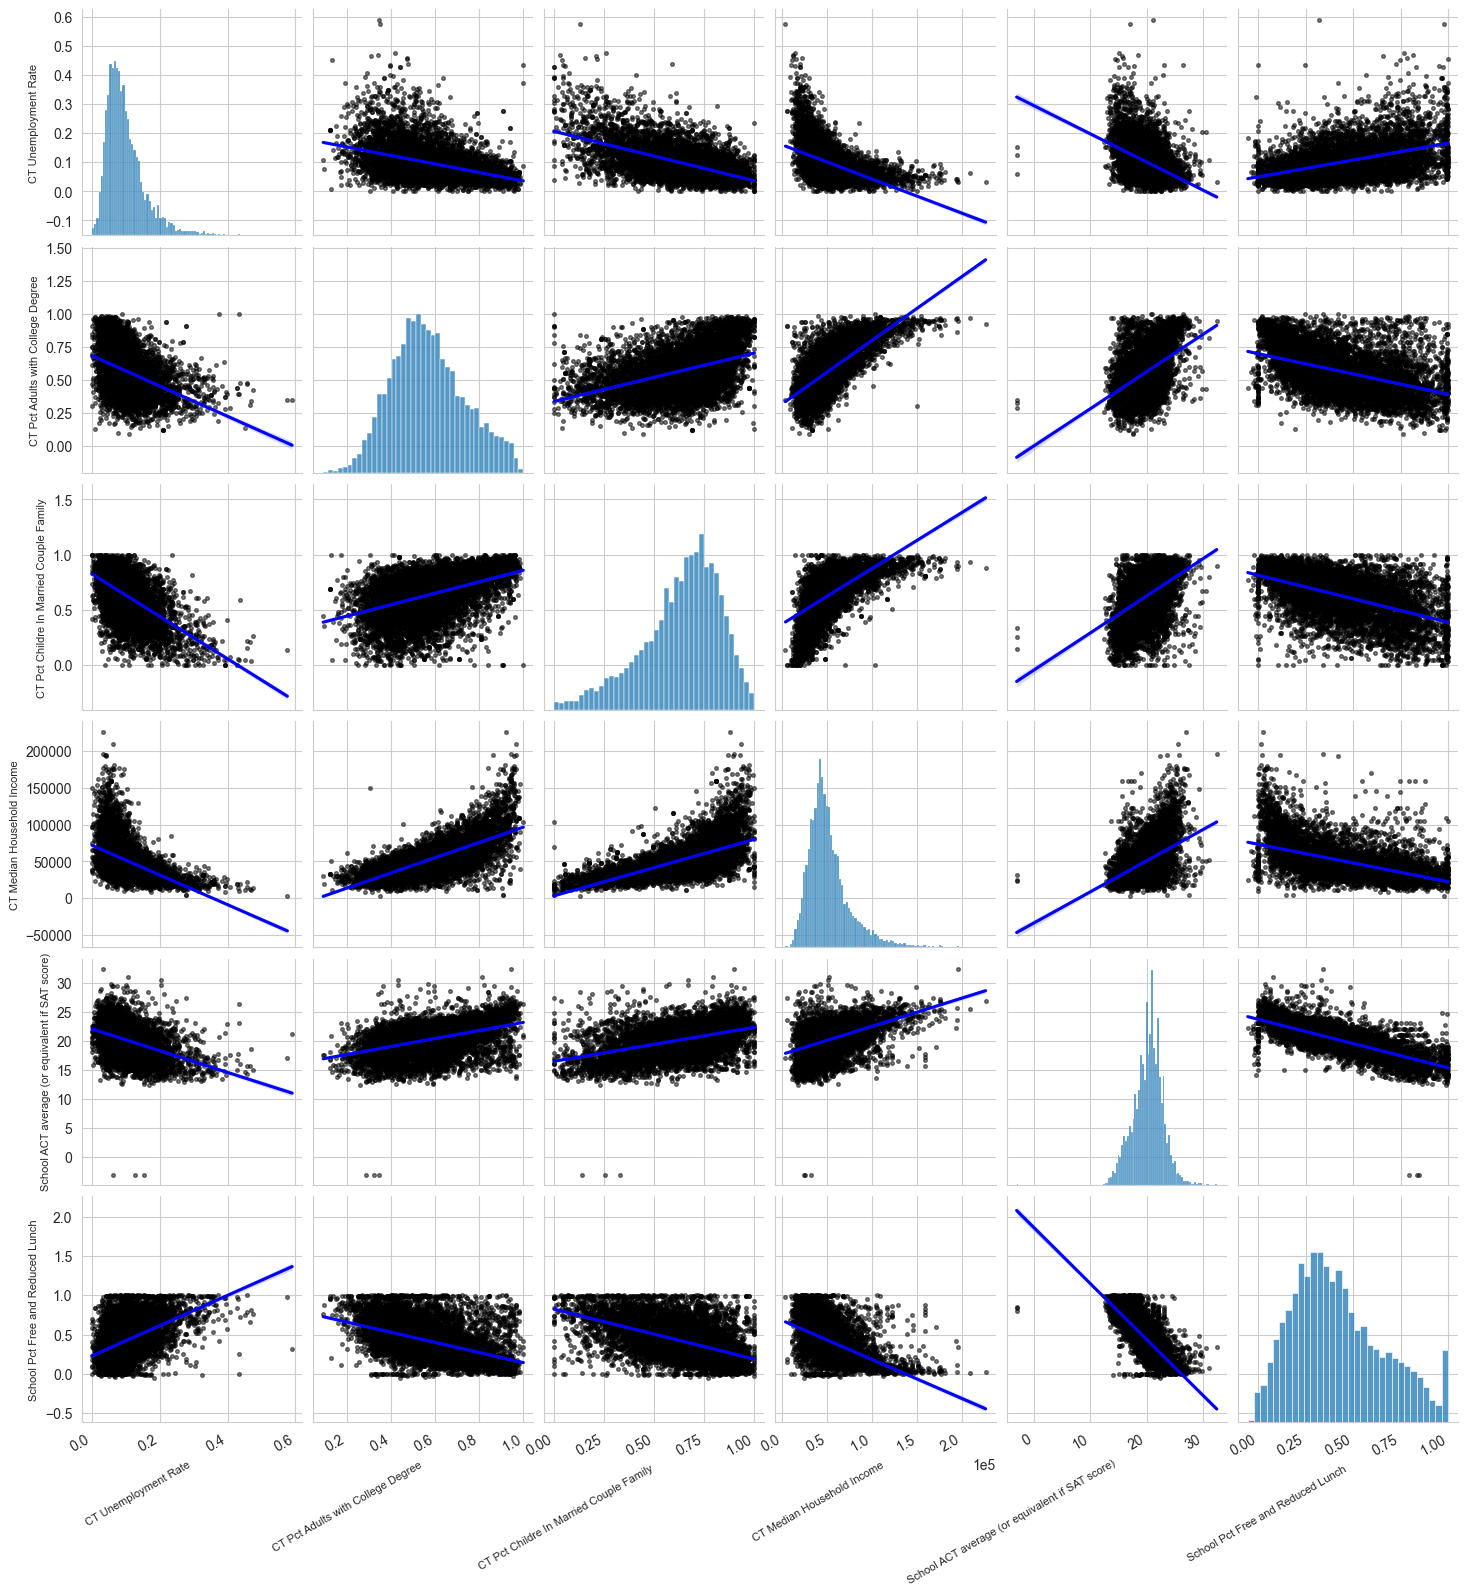

In [373]:
fig = sns.pairplot(
  edgap.drop(columns="NCESSCH School ID"),
  kind="reg",
  plot_kws={
    "line_kws": {"color": "blue"},
    "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
  }
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

Plot a single row

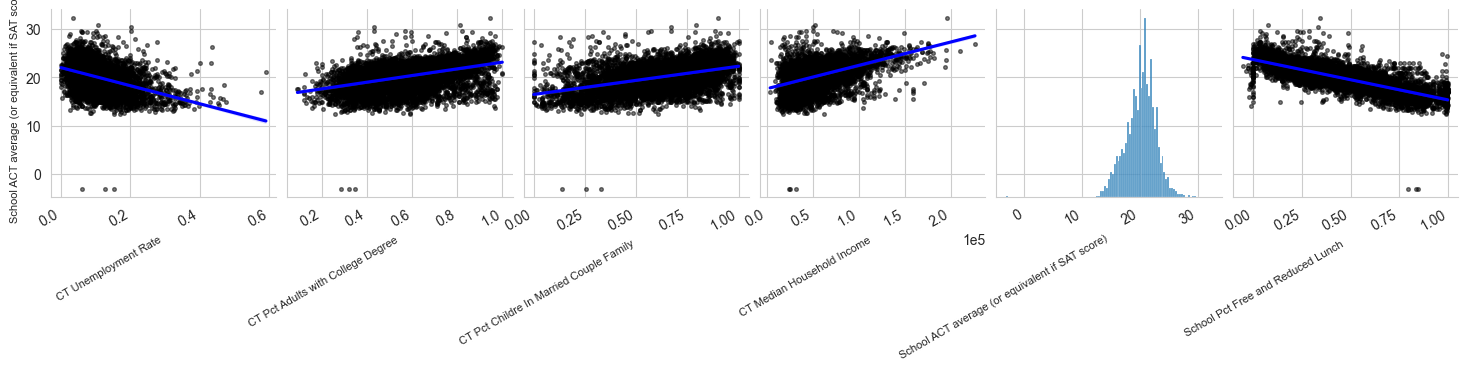

In [374]:
fig = sns.pairplot(
  edgap.drop(columns="NCESSCH School ID"),
  y_vars=['School ACT average (or equivalent if SAT score)'],
  kind="reg",
  plot_kws={
    "line_kws": {"color": "blue"},
    "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
  }
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

From the steps above, we know that:
1. There appears to be a relationship between the socioeconomic variables and the ACT score
2. There are some out-of-range ACT and percent lunch values that will need to be dealt with
3. We should have confidence that it is worthwhile to spend time preparing the data for analysis.

# Data cleaning and preparation

## Select relevent subsets of data

The school information data set contains many columns. We only need the year, school identity, location, and school type information.

Keep the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL

In [375]:
school_information = school_information[
  ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [376]:
school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


## Rename columns

We will rename the columns to follow best practices of style and being informative. We will do it before joining data sets to make it obvious that the key has the same name in each data set.

In [377]:
edgap = edgap.rename(
  columns={
    "NCESSCH School ID": "id",
    "CT Unemployment Rate": "rate_unemployment",
    "CT Pct Adults with College Degree": "percent_college",
    "CT Pct Childre In Married Couple Family": "percent_married",
    "CT Median Household Income": "median_income",
    "School ACT average (or equivalent if SAT score)": "average_act",
    "School Pct Free and Reduced Lunch": "percent_lunch",
  }
)

Rename the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL to year, id, state, zip_code, school_type, and schoo_level

In [378]:
school_information = school_information.rename(
  columns={
    'SCHOOL_YEAR': 'year', 
    'NCESSCH': 'id', 
    'LSTATE': 'state', 
    'LZIP': 'zip_code', 
    'SCH_TYPE_TEXT': 'school_type', 
    'LEVEL': 'school_level',
    'CHARTER_TEXT': 'charter'
  }
)

In [379]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [380]:
school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


From steps above we have that:
1. We selected a subset of columns of the school information data set.
2. We renamed the columns for clarity and follow formatting guidelines.
3. We are ready to join the data frames.

## Join data frames

We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity.
The value is an `string` in the school information data set after recreated and an `object` in the EdGap dataset.
We will cast the `id` column in the `EdGap` DataFrame as a `string` to be the same data type as the school information data set. We also changed the data type of zip code from `float` to `object`.

In [381]:
school_information['id'] = school_information['id'].astype('object')

In [382]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


Join the data frames and call the result df

In [383]:
df = edgap.merge(
  school_information,
  how='left',
  on='id'
)

In [384]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


Now that we have a merged data frame that contain all information for analysis.

## Quality Control

There are natural bounds for the numerical variables in the data set. Check the minimum and maximum values in each column.

In [386]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


From the information above, we know that the average_act and percent_lunch contain incorrect value as we know from the min value that contain negative value. Next, we need to set out-of-range values to NaN using Numpy library

In [387]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [388]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

We don't want to remove the entire row of incorrect value because we still want the other information so now they contain the NaN. Next we will check the school type and school level.

In [389]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [390]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [391]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

Since the ACT is for high school, so we keep only the high schools for analysis

In [392]:
df = df.loc[df['school_level'] == 'High']

Next, we need to check for any duplicated rows to prevent any incorrect value

In [393]:
df.duplicated().sum()

np.int64(0)

## Identify missing values

Let's check how many values of each variable are missing value

In [394]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


From the frame above, we can see that we only missing values from the EdGap data set and the school information data set contain all value. Let's convert the number above to percentage of values of each variable

In [395]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name="Percent Missing Values")

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


From the frame above, we can see that the percent missing value are really low, but lets check how many states that we collect data

In [396]:
df['state'].nunique()

20

So we know that the data only collected from 20 states due to omission. This is not evident by examining NaN values in the data set. As we focus in ACT and its percent of missing value is really low, so we drop the rows where the ACT score is missing

In [397]:
df = df.dropna(subset=['average_act'])

In [398]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


Now that we have all the rows that contain all non-null values. If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variableswhere data were present. So, we will not drop the rows in this data set that are missing the socioeconimic variables. We will impute the missing values.

## Data Imputation

Define the predictor variables to be `rate_unemployment`, `percent_college`, `percent_married`, `median_income`, `percent_lunch`, and `state`.

In [399]:
predictor_variables = [
  'rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter'
]

Use the iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis.

In [400]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [401]:
imputer = IterativeImputer()

Fit the imputer using the numerical predictor variables (this can include dummies for categorical variables). Define the columns to use in the imputation process.

In [402]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Let's fit the imputer from those numerical predictors

In [403]:
imputer.fit(df.loc[:, numerical_predictors])

,estimator,None
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


Now we have learn the relations between those columns and then we can apply the transform method to actually replace the missing values

In [404]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Next we can check for missing values to make sure non-null values in the data set

In [405]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


Now we have cleaned data set and ready for analysis and saved the clean data frame as a csv file

In [406]:
df.to_csv(
  '../data/education_clean.csv',
  encoding='utf-8-sig',
  index=False
)

The cleaned data set save to in `../data/education_clean.csv`

## Additional Predictor: Neighborhood Poverty Rate

To extend the baseline socioeconomic model, I include the **neighborhood poverty rate** from the NCES School Neighborhood Poverty Estimates dataset as an additional predictor.  
While EdGap already provides school-level socioeconomic indicators such as median family income and percentage of students receiving free or reduced-price lunch, these metrics reflect conditions within schools. The neighborhood poverty rate, on the other hand, captures the broader **economic environment around the school**, which may influence access to resources, peer effects, and community support.  

This variable helps test whether the **local economic context** adds explanatory power beyond what school-level socioeconomic factors already capture.  
However, because poverty rate and median income are conceptually related, I will later check for multicollinearity and interpret results carefully when both are included in the same model.

Now we are going to load new dataset to get more variables

In [ ]:
new_school_information = pd.read_csv('../data/School_Neighborhood_Poverty_Estimates%2C_2016-17.csv', encoding='unicode_escape')

Let's eplore the contents of new dataset to see the names of columns and a few example values for each columns. We also check whether the data is in tidy format.

In [ ]:
new_school_information.head()

,ï»¿X,Y,NCESSCH,NAME,IPR_EST,IPR_SE,OBJECTID,LAT1617,LON1617
0,-86.628760,33.673667,10000200277,Sequoyah Sch - Chalkville Campus,252,112,1,33.673661,-86.628755
1,-86.532753,32.519175,10000201667,Camps,217,71,2,32.519169,-86.532748
2,-87.750169,31.937797,10000201670,Det Ctr,290,77,3,31.937791,-87.750164
3,-86.083210,32.375712,10000201705,Wallace Sch - Mt Meigs Campus,267,78,4,32.375706,-86.083205
4,-86.710585,33.586713,10000201706,McNeel Sch - Vacca Campus,172,56,5,33.586707,-86.710580


Use the info method to check the data types, size of the data frame, and numbers of missing values

In [ ]:
new_school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100623 entries, 0 to 100622
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ï»¿X      100623 non-null  float64
 1   Y         100623 non-null  float64
 2   NCESSCH   100623 non-null  int64  
 3   NAME      100623 non-null  object 
 4   IPR_EST   100623 non-null  int64  
 5   IPR_SE    100623 non-null  int64  
 6   OBJECTID  100623 non-null  int64  
 7   LAT1617   100623 non-null  float64
 8   LON1617   100623 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 6.9+ MB


From the information above, we can see that there is missing value. Next, we need to check for any duplicated rows to prevent any incorrect value

In [ ]:
new_school_information.duplicated().sum()

np.int64(0)

The new school information data set contains many unrelated columns, so we only need the NCESSCH, IPR_EST and IPR_SE.

In [ ]:
new_school_information = new_school_information[['NCESSCH', 'IPR_EST', 'IPR_SE']]

In [ ]:
new_school_information.head()

,NCESSCH,IPR_EST,IPR_SE
0,10000200277,252,112
1,10000201667,217,71
2,10000201670,290,77
3,10000201705,267,78
4,10000201706,172,56


We will rename the columns to follow best practices of style and being informative. We will do it before joining data sets to make it obvious that the key has the same name in each data set.

In [ ]:
new_school_information = new_school_information.rename(
  columns={
    'NCESSCH': 'id',
    'IPR_EST': 'income_poverty_ratio_estimate',
    'IPR_SE': 'income_poverty_se'
  }
)

In [ ]:
new_school_information.head()

,id,income_poverty_ratio_estimate,income_poverty_se
0,10000200277,252,112
1,10000201667,217,71
2,10000201670,290,77
3,10000201705,267,78
4,10000201706,172,56


We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity.
The value is an `int64` in the new school information data set after recreated and an `object` in the current dataset.
We will cast the `id` column in the id of the new school information to `object` to have the same type of current `Data Frame`

In [ ]:
new_school_information['id'] = new_school_information['id'].astype('object')

In [ ]:
new_school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100623 entries, 0 to 100622
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   id                             100623 non-null  object
 1   income_poverty_ratio_estimate  100623 non-null  int64 
 2   income_poverty_se              100623 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [ ]:
new_df = df.merge(
  new_school_information,
  how='left',
  on='id'
)

In [ ]:
new_df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized,income_poverty_ratio_estimate,income_poverty_se
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes,0.380125,-0.774475,-1.466983,258,92
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No,-0.573936,0.544280,-1.272689,527,90
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No,-0.706931,0.781372,-1.339271,399,119
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No,-0.914109,0.721933,-0.484817,397,81
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No,-0.343648,0.406606,-0.631332,281,93


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             7227 non-null   object 
 1   rate_unemployment              7227 non-null   float64
 2   percent_college                7227 non-null   float64
 3   percent_married                7227 non-null   float64
 4   median_income                  7227 non-null   float64
 5   average_act                    7227 non-null   float64
 6   percent_lunch                  7227 non-null   float64
 7   year                           7227 non-null   object 
 8   state                          7227 non-null   object 
 9   zip_code                       7227 non-null   object 
 10  school_type                    7227 non-null   object 
 11  school_level                   7227 non-null   object 
 12  charter                        7227 non-null   o

Now that we have a merged data frame that contain one more variable for analysis. Let's check how many values of each variable are missing value when we add new variable.

In [ ]:
new_df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


So we can see that we don't have any missing value for new variable. Now we have cleaned data set and ready for next analysis and saved the clean data frame as a CVS file for second version

In [ ]:
new_df.to_csv(
  '../data/education_clean_v2.csv',
  encoding='utf-8-sig',
  index=False
)

The cleaned data set save to in `../data/education_clean_v2.csv`